# Exploration of the $gg \to (h^{\ast} \to) ZZ \to 4\ell$ dataset

In this tutorial, we will take some time to explore & understand the phenomenology of the off-shell Higgs production.

In [1]:
# import the packages

import pandas as pd
import numpy as np
import vector
import hist

from physics.simulation import mcfm
from physics.analysis import zz4l, zz2l2v
from physics.hstar import sigstr
from nsbi import carl

import matplotlib, matplotlib.pyplot as plt

## 1. Open the dataset

Use the `mcfm.from_csv(file_path=..., kinematics=...)` function to open three datasetsv generated according to the different hypotheses:

1. Signal-only, $|\mathcal{M}_{gg \to h^{\ast} \to ZZ}|^2$.
2. Background-only, $|\mathcal{M}_{gg \to h^{\ast} \to ZZ}|^2$.
3. Signal+background+interference, $|\mathcal{M}_{gg \to h^{\ast} \to ZZ}|^2$.

Open the corresponding datasets, remember to explicitly specify the 4-lepton observables, $x$, to be read out from each event.

In [3]:
features_4l = ['l1_pt', 'l1_eta', 'l1_phi', 'l1_energy', 'l2_pt', 'l2_eta', 'l2_phi', 'l2_energy', 'l3_pt', 'l3_eta', 'l3_phi', 'l3_energy', 'l4_pt', 'l4_eta', 'l4_phi', 'l4_energy']
data_path = '/global/cfs/cdirs/trn016/h4l_data/sm/'

events_sig = mcfm.from_csv(file_path = data_path + 'ggzz4l_sig.csv', kinematics = features_4l)
events_bkg = mcfm.from_csv(file_path = data_path +  'ggzz4l_bkg.csv', kinematics = features_4l)
events_sbi = mcfm.from_csv(file_path = data_path +  'ggzz4l_sbi.csv', kinematics = features_4l)

## 1. Basic histogramming

A binned visualzation of this can be performed using histograms, as should be familiar to all of us in HEP. Use the `hist` package to:

1. Define a histogram with 20 bins from $0 \leq p_{\rm T} < 200\, \rm GeV$.
2. Fill it with the leading lepton $p_{\rm T}^{\ell_1}$ as the observable, with weights.

In [4]:
l1pt_axis = hist.axis.Regular(20, 0, 200, label = 'l1pt')
h_l1pt_sig = hist.Hist(l1pt_axis)
h_l1pt_bkg = hist.Hist(l1pt_axis)
h_l1pt_sbi = hist.Hist(l1pt_axis)

h_l1pt_sig.fill( events_sig.kinematics['l1_pt'], weight = events_sig.weights )
h_l1pt_bkg.fill( events_bkg.kinematics['l1_pt'], weight = events_bkg.weights )
h_l1pt_sbi.fill( events_sbi.kinematics['l1_pt'], weight = events_sbi.weights )

Hist(Regular(20, 0, 200, label='l1pt'), storage=Double()) # Sum: 5.588123963430317 (5.656497839039506 with flow)

You are encouraged to visualize these in more detail by plotting them on the same axis.

## 2. Custom observable calculation: $m_{4\ell}$

Recall that the Lorentz invariant mass of a four-momentum is given by.

$$
m = \sqrt{E^2 - |{\bf{p}}|^2}.
$$

The four-vector $p$ can represent that of any of the 4 leptons, or that of the entire 4-lepton system:

$$
    m_{4\ell} = \sqrt{\left(\sum_i E_i\right)^2 - \left|\sum_i {\bf p_i}\right|^2}
$$

Let's compute this quantity using the convenient four-vector arithmetics provicded by the `vector` package. You can check your results with the correct values already saved in the event kinematics.


In [5]:
def calculate_m4l(kinematics):
    p_l1 = vector.array({'pt': kinematics['l1_pt'], 'eta': kinematics['l1_eta'], 'phi': kinematics['l1_phi'], 'energy': kinematics['l1_energy']})
    p_l2 = vector.array({'pt': kinematics['l2_pt'], 'eta': kinematics['l2_eta'], 'phi': kinematics['l2_phi'], 'energy': kinematics['l2_energy']})
    p_l3 = vector.array({'pt': kinematics['l3_pt'], 'eta': kinematics['l3_eta'], 'phi': kinematics['l3_phi'], 'energy': kinematics['l3_energy']})
    p_l4 = vector.array({'pt': kinematics['l4_pt'], 'eta': kinematics['l4_eta'], 'phi': kinematics['l4_phi'], 'energy': kinematics['l4_energy']})
    return (p_l1 + p_l2 + p_l3 + p_l4).mass

Now we histogram the 4-lepon invariant mass! Use a uniform $20\,\rm GeV$-wide bins, $180 \leq m_{4\ell} < 1000\, \rm GeV$.

In [6]:
m4l_axis = hist.axis.Regular(21, 180, 1000, label = 'm4l')
h_m4l_sig = hist.Hist(m4l_axis)
h_m4l_bkg = hist.Hist(m4l_axis)
h_m4l_sbi = hist.Hist(m4l_axis)

h_m4l_sig.fill( calculate_m4l(events_sig.kinematics), weight = events_sig.weights )
h_m4l_bkg.fill( calculate_m4l(events_bkg.kinematics), weight = events_bkg.weights )
h_m4l_sbi.fill( calculate_m4l(events_sbi.kinematics), weight = events_sbi.weights )

Hist(Regular(21, 180, 1000, label='m4l'), storage=Double()) # Sum: 5.653786601947237 (5.656497839039331 with flow)

## 3. Inteference-only contribution

Obtain the $m_{4\ell}$ distribution corresponding to the interference-only hypothesis:

$$
\color{grey} \left| \mathcal{M}_{\rm S} + \mathcal{M}_{\rm B} \right|^2 = |\mathcal{M}_{\rm S}|^2 +\color{black}  2\mathbb{R} ( \mathcal{M}^{\dag}_{\rm S} \mathcal{M}_{\rm B} ) \color{grey} + \left| \mathcal{M}_{\rm B} \right|^2
$$

Note that the above three datasets correspond to the terms in grey.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb3984ebe00>, errorbar=None, legend_artist=None)]

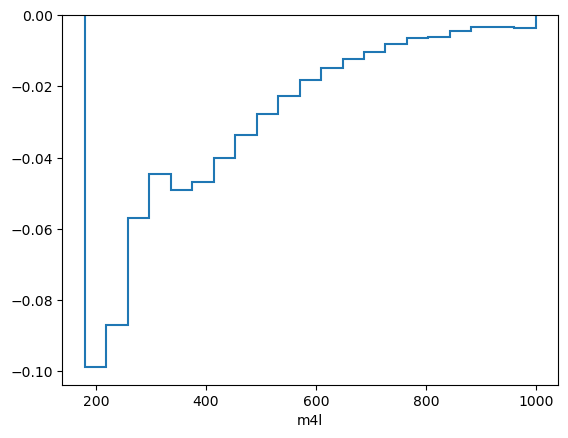

In [8]:
h_m4l_int = h_m4l_sbi - h_m4l_sig - h_m4l_bkg
h_m4l_int.plot()

What do you notice about the interference term? Is the contribution mostly positive or negative?

## 4. Modifications to Higgs process via signal strength

Recall that modifications to the Higgs signal process is assumed to occur through the signal strength parameter, $\mu$, that scales the signal-squared & inteference terms as:

$$
\left| \sqrt{\mu} \mathcal{M}_{\rm S} + \mathcal{M}_{\rm B} \right|^2 = \mu |\mathcal{M}_{\rm S}|^2 + \sqrt{\mu} 2 \mathbb{R} ( \mathcal{M}^{\dag}_{\rm S} \mathcal{M}_{\rm B} ) + \left| \mathcal{M}_{\rm B} \right|^2
$$

The code to calculate changes in the event weight of the full signal+background+interference process.

```py
mu = 1.0  # use a BSM value other than 1!
w_sbi_bsm, _ = sigstr.scale(events_sbi, signal_strength = mu)
```

Notice that setting $\mu = 0.0$ generates a background-only sample from the full SBI process. Alternatively, setting $\mu=4.0$ should "scale up" the Higgs signal: let's check this for the $m_{4\ell}$ distribution.

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_321796/2974099406.py:8: SyntaxWarning: invalid escape sequence '\m'
  h_m4l_sbi_mu4p0.plot(label='SBI ($\mu = 4.0$)', color='blue')


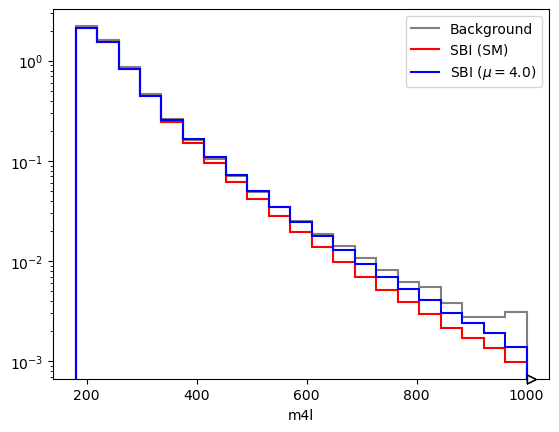

In [10]:
w_sbi_mu4p0, _ = events_sbi_mu4p0 = sigstr.scale(events_sbi, signal_strength=2.0)

h_m4l_sbi_mu4p0 = hist.Hist(m4l_axis)
h_m4l_sbi_mu4p0.fill( calculate_m4l(events_sbi.kinematics), weight = w_sbi_mu4p0)

h_m4l_bkg.plot(label='Background', color='grey')
h_m4l_sbi.plot(label='SBI (SM)', color='red')
h_m4l_sbi_mu4p0.plot(label='SBI ($\mu = 4.0$)', color='blue')

plt.yscale('log')
plt.legend()

You are also encouraged, same as previously, to check in more detail by plotting the ratio between these distributions. 